In [13]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [14]:
data = pd.read_csv('merged_ev_stats - ms_ev.csv')

In [15]:
data

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned
0,Andaman and Nicobar Island,162,146945,147107,10
1,Assam,64766,4677053,4741819,20
2,Bihar,83335,10407078,10490413,37
3,Chandigarh,2812,746881,749693,70
4,Chhattisgarh,20966,6836200,6857166,25
5,Delhi,156393,7685600,7841993,72
6,Gujarat,45272,20605484,20650756,278
7,Haryana,37035,10778270,10815305,50
8,Himachal Pradesh,1175,1964754,1965929,10
9,Jammu and Kashmir,2941,1869962,1872903,25


In [16]:
data['percent_ev'] = (data['Total Electric Vehicle']/data['Total'])*100
data['Chargers_per_vehicle'] = data['Total Electric Vehicle']/data['No. of EV chargers sanctioned']
data['state'] = data.index

In [17]:
data

,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total,No. of EV chargers sanctioned,percent_ev,Chargers_per_vehicle,state
0,Andaman and Nicobar Island,162,146945,147107,10,0.110124,16.200000,0
1,Assam,64766,4677053,4741819,20,1.365847,3238.300000,1
2,Bihar,83335,10407078,10490413,37,0.794392,2252.297297,2
3,Chandigarh,2812,746881,749693,70,0.375087,40.171429,3
4,Chhattisgarh,20966,6836200,6857166,25,0.305753,838.640000,4
5,Delhi,156393,7685600,7841993,72,1.994302,2172.125000,5
6,Gujarat,45272,20605484,20650756,278,0.219227,162.848921,6
7,Haryana,37035,10778270,10815305,50,0.342431,740.700000,7
8,Himachal Pradesh,1175,1964754,1965929,10,0.059768,117.500000,8
9,Jammu and Kashmir,2941,1869962,1872903,25,0.157029,117.640000,9


In [18]:
data.drop(['State Name', 'Total Electric Vehicle', 'Total Non-Electric Vehicle', 
          'Total', 'No. of EV chargers sanctioned'], axis = 1, inplace=True)

In [19]:
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The ELBOW curve for determining best segmentation')

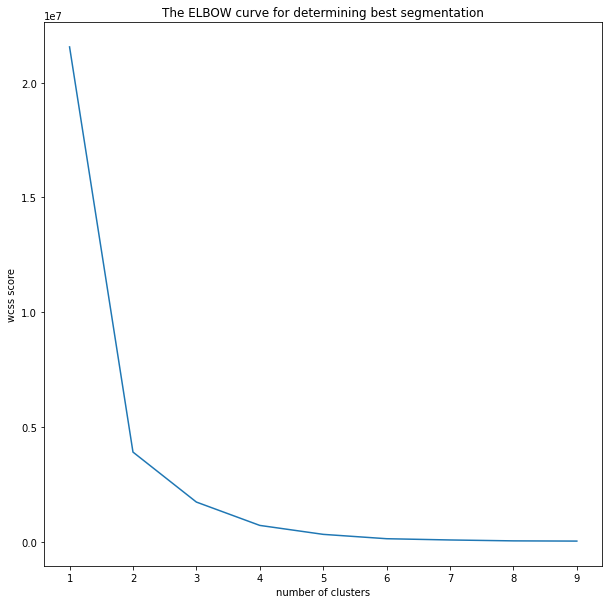

In [20]:
plt.figure(figsize = (10,10))
plt.plot(range(1, 10), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss score')
plt.title('The ELBOW curve for determining best segmentation')

In [22]:
km = KMeans(n_clusters=3)
predictions = km.fit_predict(data)

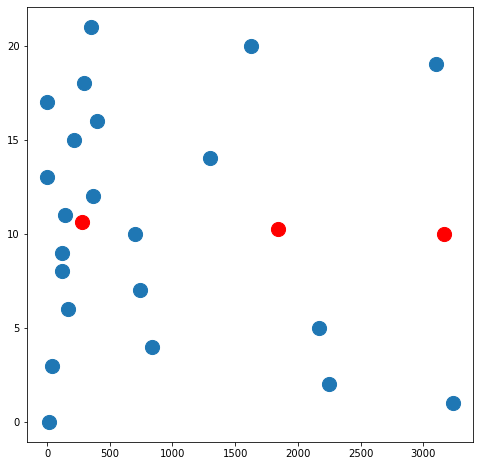

In [23]:
plt.figure(figsize = (8,8))
plt.scatter(data['Chargers_per_vehicle'], data['state'], s = 200)
plt.scatter(km.cluster_centers_[:, 1], 
            km.cluster_centers_[:, 2], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color

In [26]:
km = KMeans(n_clusters=2)
predictions = km.fit_predict(data)

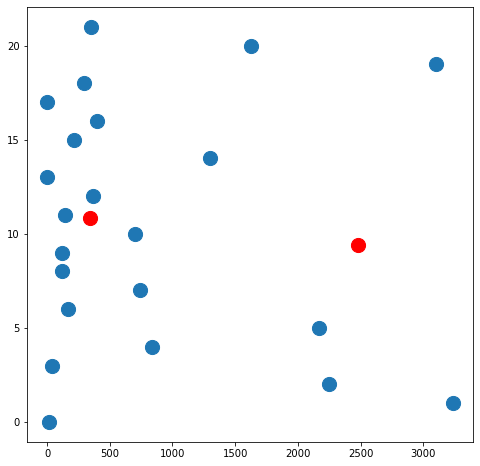

In [27]:
plt.figure(figsize = (8,8))
plt.scatter(data['Chargers_per_vehicle'], data['state'], s = 200)
plt.scatter(km.cluster_centers_[:, 1], 
            km.cluster_centers_[:, 2], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color

In [24]:
km.cluster_centers_

array([[2.42446559e-01, 2.81235680e+02, 1.06250000e+01],
       [9.64877686e-01, 1.83792502e+03, 1.02500000e+01],
       [1.14669183e+00, 3.16955000e+03, 1.00000000e+01]])

In [25]:
data

,percent_ev,Chargers_per_vehicle,state
0,0.110124,16.200000,0
1,1.365847,3238.300000,1
2,0.794392,2252.297297,2
3,0.375087,40.171429,3
4,0.305753,838.640000,4
5,1.994302,2172.125000,5
6,0.219227,162.848921,6
7,0.342431,740.700000,7
8,0.059768,117.500000,8
9,0.157029,117.640000,9
